# Deep Learning Challenge (optional)

![](../../public/titanic_intro.png)

In the early 20th century, the RMS Titanic was the pinnacle of luxury and innovation, a marvel of modern engineering. It was hailed as the "unsinkable" ship, carrying over 2,200 passengers and crew on its maiden voyage across the Atlantic. However, in the icy waters of the North Atlantic, disaster struck, and the unthinkable happened—the Titanic collided with an iceberg and sank, leading to one of the most tragic maritime disasters in history.

Now, over a century later, you are tasked with an important mission: to delve into the historical data and build a predictive model that could have foretold the fate of the passengers aboard the Titanic. This dataset contains detailed records of the passengers, including information such as age, gender, ticket class, family size, and more. **Your goal is to develop a neural network model that accurately predicts whether a passenger would have survived or perished on that fateful night.**

Your predictive model won't just be a technical achievement; it will serve as a lens through which we can better understand the human factors and decisions that played a critical role in survival. As you work through this challenge, you’ll follow the standard deep learning workflow, applying your skills to each stage:

- Data Collection: The data you need has already been gathered from historical records.
- Data Preprocessing: Clean and prepare the data for analysis (partially done for you).
- Exploratory Data Analysis (EDA): Investigate the data and uncover key patterns (partially done for you).
- Feature Engineering: Create or modify features to enhance your model’s performance (paritally done for you).
- Model Architecture Design: Choose an appropriate structure for your neural network model.
- Training: Train your model using the provided dataset.
- Evaluation: Assess your model's accuracy using a validation set and other techniques.
- Hyperparameter Tuning: Fine-tune the model’s parameters to improve performance.
- Model Testing: Test your final model on a separate test set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# sibsp        # number of siblings / spouses aboard the Titanic 	
# parch        # number of parents / children aboard the Titanic 	
# ticket       # Ticket number 	
# fare         # Passenger fare
# cabin        # Cabin number
# embark_town  # Port of Embarkation 	

#sibsp: The dataset defines family relations in this way:
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

#parch: The dataset defines family relations in this way:
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.

# load titanic dataset (DO NOT MODIFY)
df = sns.load_dataset("titanic")

## Exploratory Data Analysis
Provided below is some starter code to help familiarize yourself with the Titanic dataset. Further data analysis is encouraged but not required.

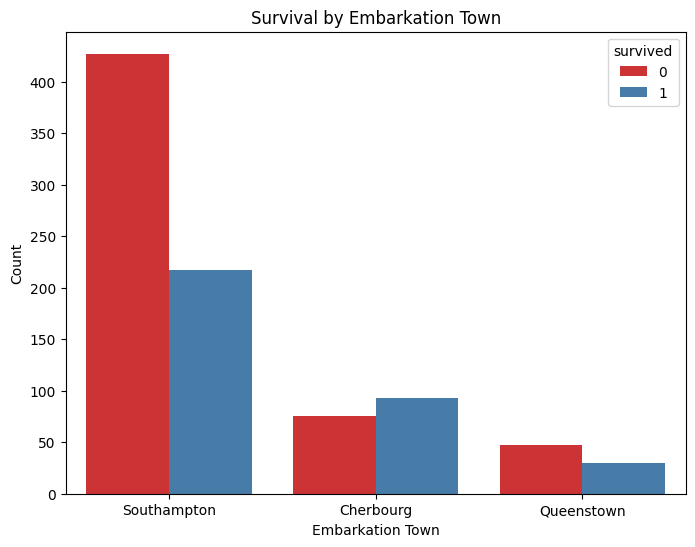

In [3]:
# df.head()

##############################
# Uncomment code to see output
##############################

# df.shape
# df.isna().sum()
# df.describe()

## Pie Chart for Survived
# plt.figure(figsize=(8, 6))
# plt.pie(df["survived"].value_counts(), labels=[f"Did Not Survive ({df.shape[0]-df['survived'].sum()})", f"Survived ({df['survived'].sum()})"], autopct='%1.1f%%')
# plt.title('Survival Count')
# plt.show()

## Pie Chart for Pclass
# pclass_counts = df['pclass'].value_counts()
# labels = [f'Class {cls}: {count} passengers' for cls, count in zip(pclass_counts.index, pclass_counts.values)]
# plt.figure(figsize=(8, 6))
# plt.pie(pclass_counts, labels=labels, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Passengers by Class')
# plt.show()

## Distribution of Age
# plt.figure(figsize=(10, 6))
# sns.histplot(df['age'].dropna(), kde=True, bins=30, color='blue')
# plt.title('Age Distribution of Passengers')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

## Survival by Sex
# plt.figure(figsize=(8, 6))
# sns.countplot(x='sex', hue='survived', data=df, palette='Set1')
# plt.title('Survival by Sex')
# plt.xlabel('Sex')
# plt.ylabel('Count')
# plt.show()

## Survival by Passenger Class
# plt.figure(figsize=(8, 6))
# sns.countplot(x='pclass', hue='survived', data=df, palette='Set2')
# plt.title('Survival by Passenger Class')
# plt.xlabel('Passenger Class')
# plt.ylabel('Count')
# plt.show()

## Survival by Embark Town
plt.figure(figsize=(8, 6))
sns.countplot(x='embark_town', hue='survived', data=df, palette='Set1')
plt.title('Survival by Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Count')
plt.show()

## Data Preprocessing and Feature Engineering

In [4]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# drop columns that are redundant or contain many NaN values
df = df.drop(["pclass", "alive", "embarked", "alone", "adult_male", "deck", "age"], axis = 1)
df = df.dropna(subset=["embark_town"])

# TODO: Further data preprocessing (optional)
df.head()


,survived,sex,sibsp,parch,fare,class,who,embark_town
0,0,male,1,0,7.2500,Third,man,Southampton
1,1,female,1,0,71.2833,First,woman,Cherbourg
2,1,female,0,0,7.9250,Third,woman,Southampton
3,1,female,1,0,53.1000,First,woman,Southampton
4,0,male,0,0,8.0500,Third,man,Southampton


In [6]:
# One Hot Encode categorical variables
df["sex"] = df["sex"].map({"male": 0, "female": 1})
for label in ["class", "who", "embark_town"]:
    df = df.join(pd.get_dummies(df[label], prefix=label))
    df = df.drop(label, axis=1)

# TODO: Further feature engineering (optional)

---
## Model Development

Check out the sections below marked `TODO` to get started on developing your model. You are free to modify and reformat any of the code provided as you see fit.


We will be using PyTorch for creating our deep learning model. 
### PyTorch Resources:
[torch.nn documentation](https://pytorch.org/docs/stable/nn.html)

[torch.nn.Sequential() documentation](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)


---

In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# feel free to add any additional packages as you see fit

In [8]:
conditions = [
    df['class_First'] == True,
    df['class_Second'] == True,
    df['class_Third'] == True
]

choices = [1,2,3]
df['class'] = np.select(conditions, choices, default=None)
df.head()

,survived,sex,sibsp,parch,fare,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class
0,0,0,1,0,7.2500,False,False,True,False,True,False,False,False,True,3
1,1,1,1,0,71.2833,True,False,False,False,False,True,True,False,False,1
2,1,1,0,0,7.9250,False,False,True,False,False,True,False,False,True,3
3,1,1,1,0,53.1000,True,False,False,False,False,True,False,False,True,1
4,0,0,0,0,8.0500,False,False,True,False,True,False,False,False,True,3


In [9]:
conditions = [
    df['embark_town_Cherbourg'] == True,
    df['embark_town_Queenstown'] == True,
    df['embark_town_Southampton'] == True
]

choices = [1,2,3]
df['embark'] = np.select(conditions, choices, default=None)
df.head()

,survived,sex,sibsp,parch,fare,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,class,embark
0,0,0,1,0,7.2500,False,False,True,False,True,False,False,False,True,3,3
1,1,1,1,0,71.2833,True,False,False,False,False,True,True,False,False,1,1
2,1,1,0,0,7.9250,False,False,True,False,False,True,False,False,True,3,3
3,1,1,1,0,53.1000,True,False,False,False,False,True,False,False,True,1,3
4,0,0,0,0,8.0500,False,False,True,False,True,False,False,False,True,3,3


In [10]:
df['who_child']=df['who_child'].map({False: 0, True: 1})

labels = ['class_First', 'class_Second', 'class_Third', 'who_man', 'who_woman', 'embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton']
for label in labels:
    df = df.drop(label, axis=1)

df.head()

,survived,sex,sibsp,parch,fare,who_child,class,embark
0,0,0,1,0,7.2500,0,3,3
1,1,1,1,0,71.2833,0,1,1
2,1,1,0,0,7.9250,0,3,3
3,1,1,1,0,53.1000,0,1,3
4,0,0,0,0,8.0500,0,3,3


Shapes of datasets:
X_train: torch.Size([622, 7]), y_train: torch.Size([622])
X_val: torch.Size([133, 7]), y_val: torch.Size([133])
X_test: torch.Size([134, 7]), y_test: torch.Size([134])
Sample weights length: 622
Training data length: 622


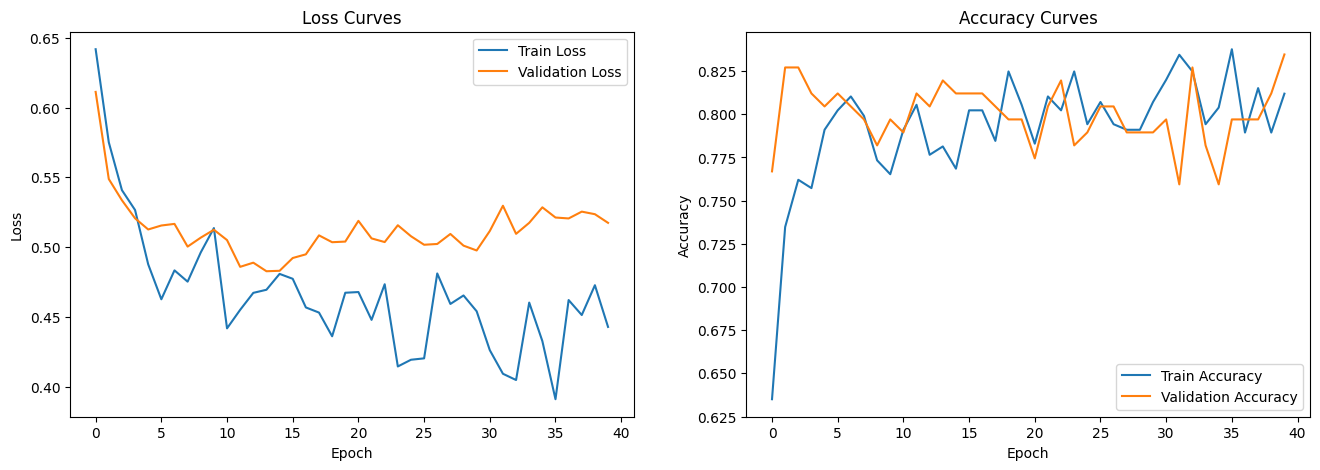

Train Loss: 0.4427
Validation Loss: 0.5173
Train Accuracy: 0.8119
Validation Accuracy: 0.8346


In [11]:
### --------------------------------------------
### TODO 1/4: modify train/validation/test split
### --------------------------------------------

train_size = 0.7
validation_size = 0.15
test_size = 0.15

# Features and target
X = df.drop(columns=['survived'])
y = df['survived']

# Convert DataFrame to torch tensors
def to_torch_tensor(X: pd.DataFrame, y: pd.Series) -> (torch.Tensor, torch.Tensor):
    return (
        torch.tensor(X.to_numpy(dtype=np.float32), dtype=torch.float32),
        torch.tensor(y.to_numpy(dtype=np.float32), dtype=torch.float32)
    )

X, y = to_torch_tensor(X, y)

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=validation_size / (validation_size + test_size), random_state=42, stratify=y_temp)

### --------------------------------------------END TODO 1/4

# Verify the shapes of datasets
print("Shapes of datasets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Function to calculate sample weights
def calculate_class_weights(y):
    class_sample_count = torch.tensor([(y == t).sum() for t in torch.unique(y, sorted=True)], dtype=torch.float)
    weight = 1. / class_sample_count
    samples_weight = torch.tensor([weight[int(t)] for t in y], dtype=torch.float)
    return samples_weight

samples_weight = calculate_class_weights(y_train)

# Verify the length of sample weights
print(f"Sample weights length: {len(samples_weight)}")
print(f"Training data length: {len(y_train)}")

# Create the sampler
sampler = WeightedRandomSampler(weights=samples_weight, num_samples=len(samples_weight), replacement=True)

### Optional: Standardize the data
scaler = StandardScaler()
X_train = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_val = torch.tensor(scaler.transform(X_val), dtype=torch.float32)
X_test = torch.tensor(scaler.transform(X_test), dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

### ------------------------------------------------
### TODO 2/4: Define model architecture here
### ------------------------------------------------
class TitanicNN(nn.Module):
    def __init__(self):
        super(TitanicNN, self).__init__()
        self.fc1 = nn.Linear(7, 128)  # 7 features in data
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

        self.dropout = nn.Dropout(p=0.5)

        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)
        self.bn3 = nn.BatchNorm1d(32)

    def forward(self, x):
        ### ------------------------------------------------
        ### TODO 3/4: Define forward pass here
        ### ------------------------------------------------
        x = torch.nn.functional.gelu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.nn.functional.gelu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.nn.functional.gelu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x
        ### ------------------------------------------------END TODO 3/4

model = TitanicNN()

### ---------------------------------------------------------------------------
### TODO 4/4: modify hyperparameters (choice of optimizer, learning rate, etc.)
### ---------------------------------------------------------------------------

epochs = 40
batch_size = 32
lr = 0.001

loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

### ---------------------------------------------------------------------------END TODO 4/4

train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

def train_validate(train_loader: DataLoader, val_loader: DataLoader, model: nn.Module, loss_function: nn.Module, optimizer: torch.optim.Optimizer):
    size = len(train_loader.dataset)
    model.train()
    running_loss, train_accuracy = 0, 0
    for batch, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_function(pred, y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        pred_binary = (pred > 0.5).float()
        correct_predictions = (pred_binary == y.unsqueeze(1)).float().sum().item()
        train_accuracy += correct_predictions

    train_loss = running_loss / len(train_loader)
    train_accuracy /= size

    size = len(val_loader.dataset)
    num_batches = len(val_loader)
    model.eval()
    val_loss, val_accuracy = 0, 0
    with torch.no_grad():
        for X, y in val_loader:
            pred = model(X)
            val_loss += loss_function(pred, y.unsqueeze(1)).item()
            pred_binary = (pred > 0.5).float()
            correct_predictions = (pred_binary == y.unsqueeze(1)).float().sum().item()
            val_accuracy += correct_predictions

    val_loss /= num_batches
    val_accuracy /= size
    return train_loss, val_loss, train_accuracy, val_accuracy

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
for t in range(epochs):
    train_loss, val_loss, train_accuracy, val_accuracy = train_validate(train_loader, val_loader, model, loss_function, optimizer)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

def plot_train_curves(train_losses: list, val_losses: list, train_accuracies: list, val_accuracies: list) -> None:
    plt.figure(figsize=(16, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()
    plt.show()

    print(f'Train Loss: {train_losses[-1]:.4f}')
    print(f'Validation Loss: {val_losses[-1]:.4f}')
    print(f'Train Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Validation Accuracy: {val_accuracies[-1]:.4f}')

plot_train_curves(train_losses, val_losses, train_accuracies, val_accuracies)

# Model Testing

After training and optimizing your model, run the below cell to test it on your test dataset. The test function have already been written for you

In [12]:
def test(test_loader, model, loss_function):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    model.eval()
    test_loss, correct_predictions = 0, 0
    
    with torch.no_grad():
        for X, y in test_loader:
            pred = model(X)
            y = y.unsqueeze(1)
            test_loss += loss_function(pred, y).item()

            # Convert probabilities to binary predictions
            pred_binary = (pred > 0.5).float()
            correct_predictions += (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
    
    # Average loss and accuracy
    test_loss /= num_batches
    test_accuracy = correct_predictions / size * 100  # Convert to percentage

    print(f"Test Set Metrics:\n Accuracy: {test_accuracy:>0.1f}%\n Loss: {test_loss:>8f} \n")
    
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
test(test_loader, model, loss_function)

Test Set Metrics:
 Accuracy: 81.3%
 Loss: 0.414336 

